In [1]:
import numpy as np
import matplotlib.pyplot as plt

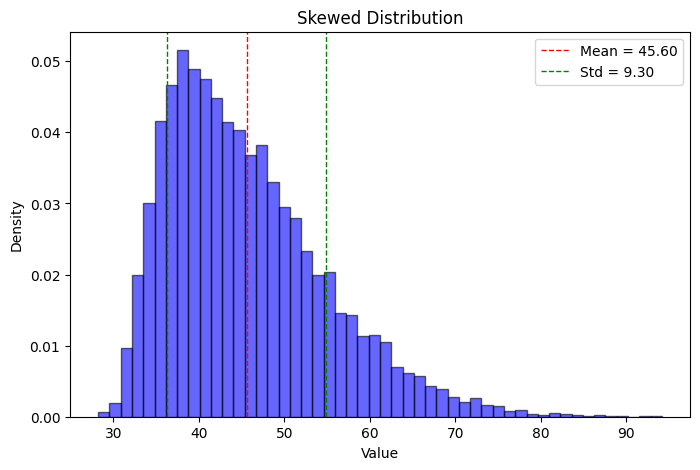

Computed Mean: 45.60
Computed Standard Deviation: 9.30


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

# Parameters
mean_target = 45.6
std_target = 9.3
skewness = 7  # Positive skew makes it fall off faster on the right side

# Generate a skewed distribution
def generate_skewed_distribution(mean, std, skewness, size=10000):
    # Generate data from a skewed normal distribution
    data = skewnorm.rvs(a=skewness, size=size)
    
    # Scale to match the target mean and standard deviation
    data_mean = np.mean(data)
    data_std = np.std(data)
    scaled_data = (data - data_mean) / data_std  # Normalize to mean=0, std=1
    scaled_data = scaled_data * std + mean  # Scale to target mean and std
    
    return scaled_data

# Generate the data
data = generate_skewed_distribution(mean_target, std_target, skewness)

# Plot the distribution
plt.figure(figsize=(8, 5))
plt.hist(data, bins=50, density=True, alpha=0.6, color='blue', edgecolor='black')
plt.title('Skewed Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.axvline(np.mean(data), color='red', linestyle='dashed', linewidth=1, label=f'Mean = {np.mean(data):.2f}')
plt.axvline(np.mean(data) + np.std(data), color='green', linestyle='dashed', linewidth=1, label=f'Std = {np.std(data):.2f}')
plt.axvline(np.mean(data) - np.std(data), color='green', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()

# Print the computed mean and standard deviation
print(f"Computed Mean: {np.mean(data):.2f}")
print(f"Computed Standard Deviation: {np.std(data):.2f}")

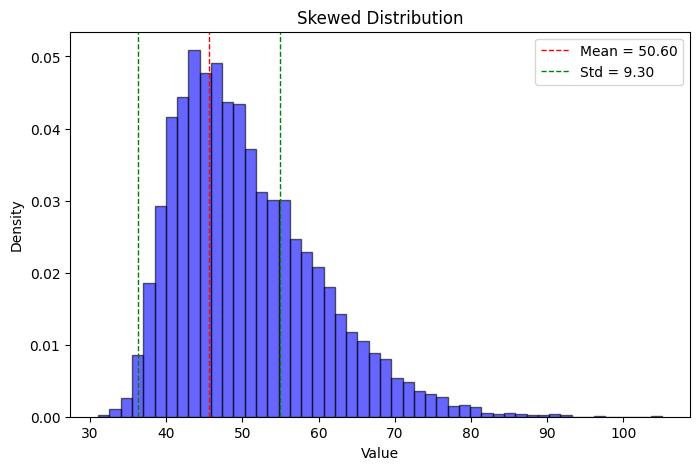

Computed Mean: 45.60
Computed Standard Deviation: 9.30


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

# Parameters
mean_target = 45.6+5
std_target = 9.3
skewness = 6  # Negative skew makes it fall off faster on the right side

# Generate a skewed distribution
def generate_skewed_distribution(mean, std, skewness, size=10000):
    # Generate data from a skewed normal distribution
    data = skewnorm.rvs(a=skewness, size=size)
    
    # Scale to match the target standard deviation
    data_std = np.std(data)
    scaled_data = data / data_std * std  # Normalize to std=1 and scale to target std
    
    # Adjust to match the target mean after skewing
    scaled_data = scaled_data + (mean - np.mean(scaled_data))
    
    return scaled_data

# Generate the data
data = generate_skewed_distribution(mean_target, std_target, skewness)

# Plot the distribution
plt.figure(figsize=(8, 5))
plt.hist(data, bins=50, density=True, alpha=0.6, color='blue', edgecolor='black')
plt.title('Skewed Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.axvline(np.mean(data)-5, color='red', linestyle='dashed', linewidth=1, label=f'Mean = {np.mean(data):.2f}')
plt.axvline(np.mean(data)-5 + np.std(data), color='green', linestyle='dashed', linewidth=1, label=f'Std = {np.std(data):.2f}')
plt.axvline(np.mean(data)-5 - np.std(data), color='green', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()

# Print the computed mean and standard deviation
print(f"Computed Mean: {np.mean(data)-5:.2f}")
print(f"Computed Standard Deviation: {np.std(data):.2f}")


In [48]:
array_size = (1024, 1024)
print(np.prod(array_size), 1024*1024)

1048576 1048576


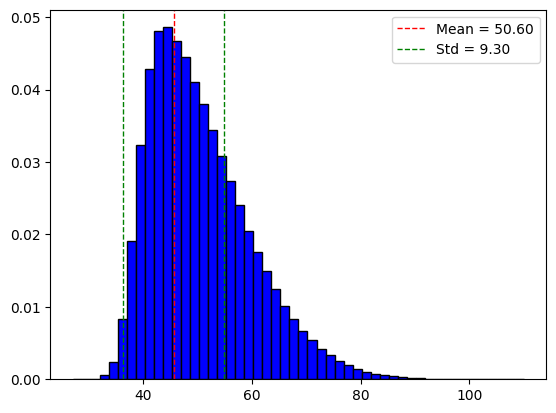

In [36]:
array_size = (1024, 1024)
skewed_array = generate_skewed_distribution(mean_target, std_target, skewness, size=np.prod(array_size)).reshape(array_size)
plt.hist(skewed_array.flatten(), bins=50, density=True, color='blue', edgecolor='black')
plt.axvline(np.mean(data)-5, color='red', linestyle='dashed', linewidth=1, label=f'Mean = {np.mean(data):.2f}')
plt.axvline(np.mean(data)-5 + np.std(data), color='green', linestyle='dashed', linewidth=1, label=f'Std = {np.std(data):.2f}')
plt.axvline(np.mean(data)-5 - np.std(data), color='green', linestyle='dashed', linewidth=1)
plt.legend()

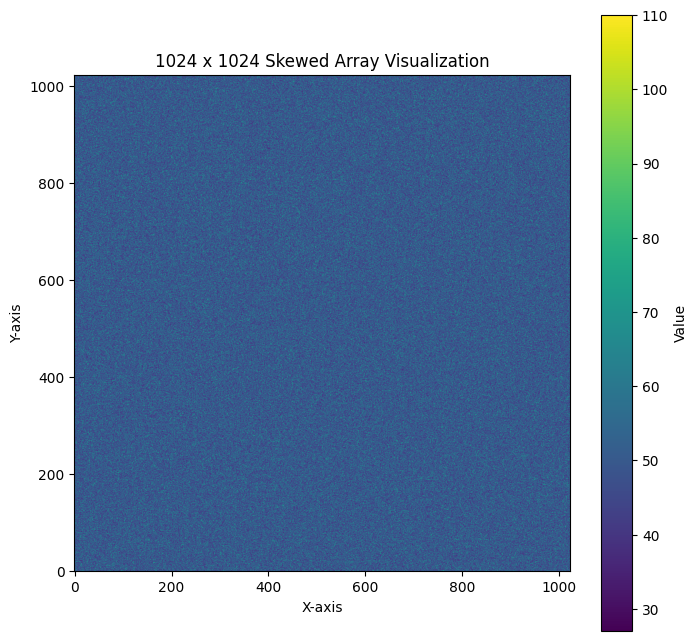

In [37]:
# Plot the 1024 x 1024 array with a colormap
plt.figure(figsize=(8, 8))
plt.imshow(skewed_array, cmap='viridis', origin='lower')
plt.colorbar(label='Value')
plt.title('1024 x 1024 Skewed Array Visualization')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [2]:
def introduce_cold_pixels(image, percentage, peak, std_dev, lower_limit=0):
    # Copy the image to avoid modifying the original
    modified_image = np.copy(image)
    
    # Calculate the total number of pixels to be set to zero
    total_pixels = modified_image.size
    num_dead_pixels = int(total_pixels * (percentage / 100))
    
    # Randomly choose pixel indices to set as 'dead'
    indices = np.unravel_index(
        np.random.choice(total_pixels, num_dead_pixels, replace=False),
        modified_image.shape
    )
    
    dead_pixel_values = []
    while len(dead_pixel_values) < num_dead_pixels:
        sample = np.random.normal(loc=peak, scale=std_dev)
        if lower_limit <= sample:# <= upper_limit:
            dead_pixel_values.append(sample)
    dead_pixel_values = np.array(dead_pixel_values)

    # Set chosen pixels to zero
    modified_image[indices] = dead_pixel_values

    return modified_image

In [3]:
def introduce_hot_pixels(image, percentage, peak, std_dev, upper_limit):
    # Copy the image to avoid modifying the original
    modified_image = np.copy(image)
    
    # Calculate the total number of pixels to be set as 'hot'
    total_pixels = modified_image.size
    num_hot_pixels = int(total_pixels * (percentage / 100))
    
    # Randomly choose pixel indices to set as 'hot'
    indices = np.unravel_index(
        np.random.choice(total_pixels, num_hot_pixels, replace=False),
        modified_image.shape
    )
    
    hot_pixel_values = []
    while len(hot_pixel_values) < num_hot_pixels:
        sample = np.random.normal(loc=peak, scale=std_dev)
        if sample <= upper_limit:
            hot_pixel_values.append(sample)
    hot_pixel_values = np.array(hot_pixel_values)

    # Set chosen pixels to hot values
    modified_image[indices] = hot_pixel_values
    
    return modified_image

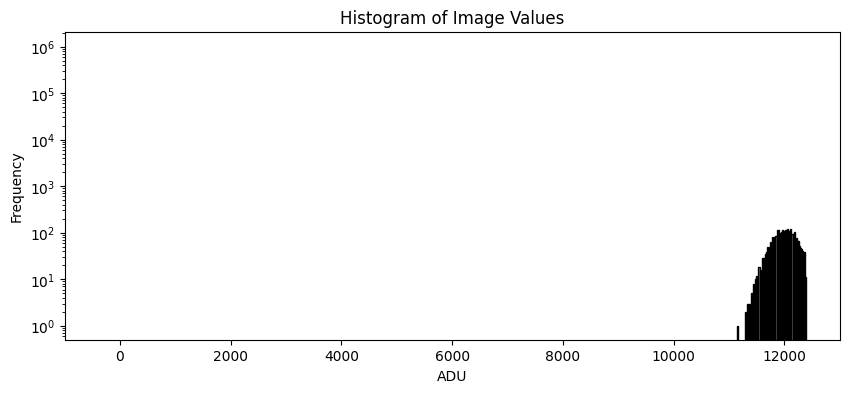

In [4]:
# Usage example
#image = np.ones((1024, 1024))  # 1024x1024 image filled with ones
temp = 15000
image_test = np.full((1024, 1024), 15000)  # 1024x1024 image filled with 12393
#image = np.random.uniform(0, 12393, size=(1024, 1024))

percentage_hot =  0.306 # % of pixels to be set as 'hot'
peak_hot = 12000       # Mean value of hot pixels
std_div_hot = 15**2    # Variance of the hot pixel values

# Apply hot pixels
#image_with_dead_pixels = introduce_dead_pixels(image, percentage_cold)
image_with_hot_pixels = introduce_hot_pixels(image_test, percentage_hot, peak_hot, std_div_hot, upper_limit=12393)

# Plot the image with the hot pixels
plt.figure(figsize=(10, 4))
plt.hist(image_with_hot_pixels.flatten(), bins=200, color='gray', edgecolor='black')
plt.title("Histogram of Image Values")
plt.xlabel("ADU")
plt.ylabel("Frequency")
plt.xlim(-1000,13000)
plt.yscale('log')
plt.show()

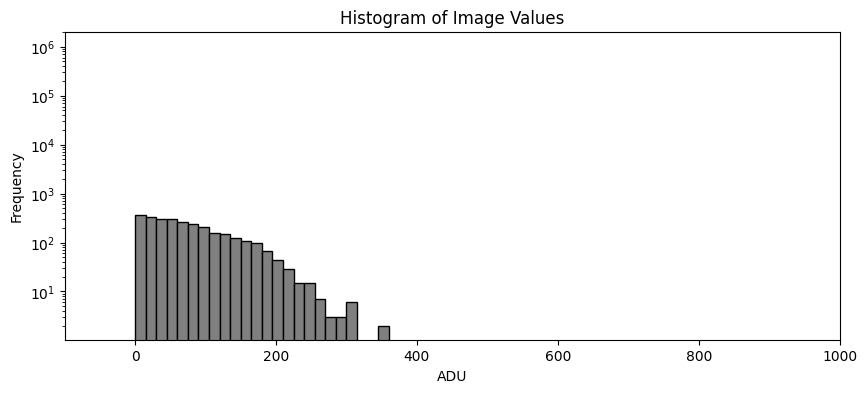

In [5]:
percentage_cold = 0.271  # % of pixels to be set as 'hot'
peak_cold = 0       # Mean value of hot pixels
std_div_cold = 10**2    # Variance of the hot pixel values


image_with_dead_pixels = introduce_cold_pixels(image_test, percentage_cold, peak_cold, std_div_cold, lower_limit=0)
plt.figure(figsize=(10, 4))
plt.hist(image_with_dead_pixels.flatten(), bins=1000, color='gray', edgecolor='black')
plt.title("Histogram of Image Values")
plt.xlabel("ADU")
plt.ylabel("Frequency")
plt.xlim(-100,1000)
plt.yscale('log')
plt.show()

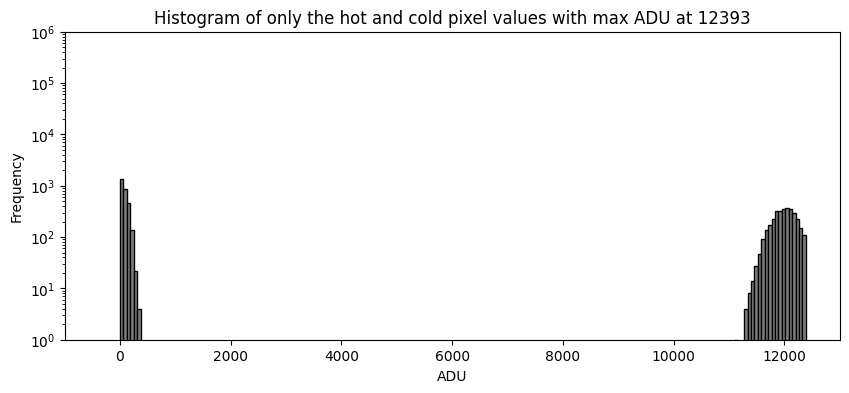

In [6]:
combined_array = np.concatenate((image_with_dead_pixels , image_with_hot_pixels))
filtered_array = combined_array[combined_array != temp]


plt.figure(figsize=(10, 4))
plt.hist(filtered_array.flatten(), bins=200, color='gray', edgecolor='black')
plt.title("Histogram of only the hot and cold pixel values with max ADU at 12393")
plt.xlabel("ADU")
plt.ylabel("Frequency")
plt.xlim(-1000,13000)
plt.ylim(1, 1e6)  
plt.yscale('log')
plt.show()

In [7]:
import numpy as np

def introduce_hot_and_dead_pixels(image, hot_percentage, dead_percentage, hot_peak, hot_std_dev, hot_upper_limit, dead_mean=0, dead_std_dev=10, dead_lower_limit=0):
    """
    Introduce hot and dead pixels into an image while ensuring no overlap in indices and setting value limits for both types of pixels.
    
    Parameters:
        image (np.ndarray): Input 2D image array.
        hot_percentage (float): Percentage of pixels to set as hot pixels.
        dead_percentage (float): Percentage of pixels to set as dead pixels.
        hot_peak (float): Mean value for the Gaussian distribution of hot pixels.
        hot_std_dev (float): Standard deviation for the Gaussian distribution of hot pixels.
        hot_lower_limit (float): Minimum value for the hot pixels.
        hot_upper_limit (float): Maximum value for the hot pixels.
        dead_mean (float): Mean value for the Gaussian distribution of dead pixels.
        dead_std_dev (float): Standard deviation for the Gaussian distribution of dead pixels.
        dead_lower_limit (float): Minimum value for the dead pixels.
        dead_upper_limit (float): Maximum value for the dead pixels.

    Returns:
        np.ndarray: Modified image with hot and dead pixels.
    """
    # Copy the image to avoid modifying the original
    modified_image = np.copy(image)

    # Calculate the total number of pixels to set as hot and dead
    total_pixels = modified_image.size
    num_hot_pixels = int(total_pixels * (hot_percentage / 100))
    num_dead_pixels = int(total_pixels * (dead_percentage / 100))

    # Randomly select unique indices for hot and dead pixels
    hot_indices = np.random.choice(total_pixels, num_hot_pixels, replace=False)
    remaining_indices = np.setdiff1d(np.arange(total_pixels), hot_indices)
    dead_indices = np.random.choice(remaining_indices, num_dead_pixels, replace=False)

    # Convert indices to the original shape
    hot_indices = np.unravel_index(hot_indices, modified_image.shape)
    dead_indices = np.unravel_index(dead_indices, modified_image.shape)

    # Generate hot pixel values from a Gaussian distribution, clipped to the specified range
    hot_pixel_values = []
    while len(hot_pixel_values) < num_hot_pixels:
        sample = np.random.normal(loc=hot_peak, scale=np.sqrt(hot_std_dev))
        if sample <= hot_upper_limit:
            hot_pixel_values.append(sample)
    hot_pixel_values = np.array(hot_pixel_values)

    # Generate dead pixel values from a Gaussian distribution within the [dead_lower_limit, dead_upper_limit]
    dead_pixel_values = []
    while len(dead_pixel_values) < num_dead_pixels:
        sample = np.random.normal(loc=dead_mean, scale=dead_std_dev)
        if dead_lower_limit <= sample:
            dead_pixel_values.append(sample)
    dead_pixel_values = np.array(dead_pixel_values)

    # Set hot pixel values
    modified_image[hot_indices] = hot_pixel_values

    # Set dead pixel values
    modified_image[dead_indices] = dead_pixel_values

    return modified_image


In [8]:
# Create a 1024x1024 array filled with a constant value
image = np.random.normal(loc=5500, scale=100, size=(1024, 1024))

# Introduce hot and dead pixels into the image
modified_image = introduce_hot_and_dead_pixels(
    image,
    hot_percentage=0.306,  # 1% of the pixels will be hot
    dead_percentage=0.217,  # 1% of the pixels will be dead
    hot_peak=12000,
    hot_std_dev=150**2,
    hot_upper_limit=12393,  # Hot pixel values must be at most 10000
    dead_mean=1,
    dead_std_dev=10**2,
    dead_lower_limit=0,  # Dead pixel values must be at least 0
)


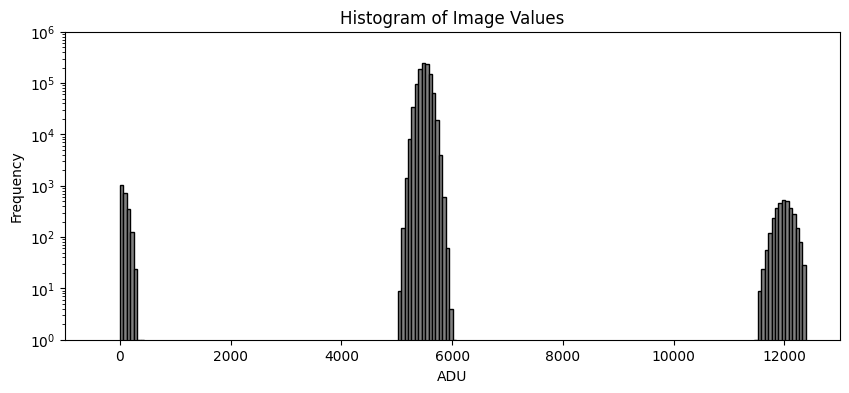

In [9]:
plt.figure(figsize=(10, 4))
plt.hist(modified_image.ravel(), bins=200, color='gray', edgecolor='black')
plt.title("Histogram of Image Values")
plt.xlabel("ADU")
plt.ylabel("Frequency")
plt.xlim(-1000,13000)
plt.ylim(1, 1e6)  
plt.yscale('log')
plt.show()

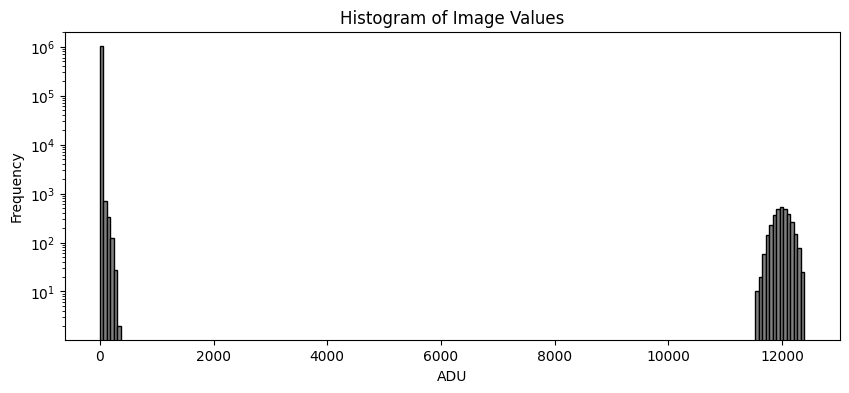

In [10]:
mean=5500, 
std_dev=100
size=(1024, 1024)

gaussian_samples = np.random.normal(loc=mean, scale=std_dev, size=(1024, 1024))
image = np.log10(gaussian_samples)  # Apply the exponential function to each element

modified_image = introduce_hot_and_dead_pixels(
    image,
    hot_percentage=0.306,  # 1% of the pixels will be hot
    dead_percentage=0.217,  # 1% of the pixels will be dead
    hot_peak=12000,
    hot_std_dev=150**2,
    hot_upper_limit=12393,  # Hot pixel values must be at most 10000
    dead_mean=0,
    dead_std_dev=10**2,
    dead_lower_limit=0,  # Dead pixel values must be at least 0
)

plt.figure(figsize=(10, 4))
plt.hist(modified_image.ravel(), bins=200, color='gray', edgecolor='black')
plt.title("Histogram of Image Values")
plt.xlabel("ADU")
plt.ylabel("Frequency")
#plt.xlim(-1000,13000)
#plt.ylim(1, 1e6)  
plt.yscale('log')
plt.show()

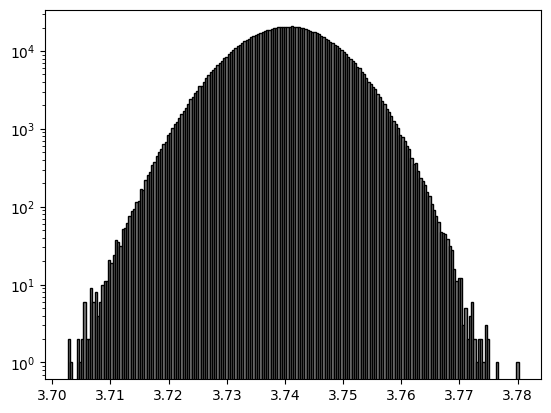

In [11]:
gaussian_samples = np.log10(np.random.normal(loc=mean, scale=std_dev, size=(1024, 1024)))
plt.hist(gaussian_samples.ravel(), bins=200, color='gray', edgecolor='black')
plt.yscale('log')

In [40]:
import cabaret
camera_width  = 1024
camera_height = 1024
camera_dark_current = 0.2
exposure_time = 10
camera    = cabaret.Camera(width=camera_width, height=camera_height, dark_current=camera_dark_current)

(array([1.41904e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 2.83846e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 2.83807e+05, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.89236e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 9.46130e+04, 0.00000e+00, 0.00

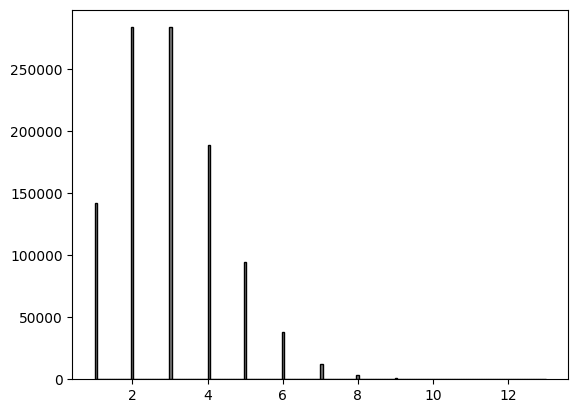

In [41]:

base = np.ones((camera.height, camera.width)).astype(np.float64)
base += np.random.poisson(base * camera.dark_current * exposure_time).astype(np.float64)
plt.hist(base.ravel(), bins=200, color='gray', edgecolor='black')

(array([3.0000e+00, 4.7000e+01, 3.1600e+02, 1.6370e+03, 6.0500e+03,
        1.6296e+04, 3.3226e+04, 5.2680e+04, 6.9101e+04, 7.9283e+04,
        8.1610e+04, 8.0815e+04, 7.6369e+04, 7.1339e+04, 6.6155e+04,
        6.0229e+04, 5.4133e+04, 4.8182e+04, 4.2744e+04, 3.7008e+04,
        3.1938e+04, 2.6867e+04, 2.2727e+04, 1.8630e+04, 1.5271e+04,
        1.2608e+04, 1.0066e+04, 8.0530e+03, 6.2990e+03, 4.7660e+03,
        3.7850e+03, 2.8480e+03, 2.1010e+03, 1.5660e+03, 1.1560e+03,
        8.2900e+02, 5.8100e+02, 4.0300e+02, 2.6800e+02, 2.0900e+02,
        1.1800e+02, 9.3000e+01, 6.7000e+01, 3.5000e+01, 2.5000e+01,
        2.1000e+01, 8.0000e+00, 9.0000e+00, 1.0000e+00, 5.0000e+00]),
 array([ 30.02975694,  31.6695066 ,  33.30925626,  34.94900592,
         36.58875558,  38.22850524,  39.8682549 ,  41.50800456,
         43.14775422,  44.78750388,  46.42725354,  48.0670032 ,
         49.70675286,  51.34650252,  52.98625218,  54.62600185,
         56.26575151,  57.90550117,  59.54525083,  61.18500049

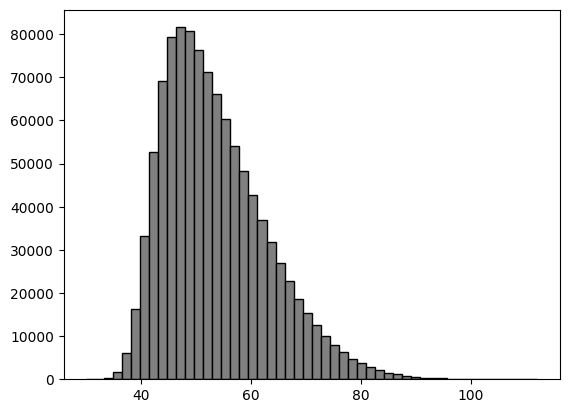

In [45]:
plt.hist((base+skewed_array).ravel(), bins=50, color='gray', edgecolor='black')

In [49]:
def warm_pixels(camera, exposure_time = 10, mean_warm = 45.6+5, std_warm = 9.3, skewness_warm = 6, size=10000):
    base = np.ones((camera.height, camera.width))
    base += np.random.poisson(base * camera.dark_current * exposure_time)
    
    # Generate data from a skewed normal distribution
    data = skewnorm.rvs(a=skewness_warm, size=size)
    
    # Scale to match the target standard deviation
    data_std = np.std(data)
    scaled_data = data / data_std * std_warm  # Normalize to std=1 and scale to target std
    
    # Adjust to match the target mean after skewing
    scaled_data = scaled_data + (mean_warm - np.mean(scaled_data))
    scaled_data = scaled_data.reshape(camera.height, camera.width)
    warm = base + scaled_data
    
    return warm, scaled_data

In [50]:
# Parameters
ra  = 346.6263750   # in degrees
dec = -5.04346111   # in degrees
exposure_time = 10  # in seconds

num_pixels_shift = 4
num_light_images = 10
num_dark_images = 5
camera_width  = 1024
camera_height = 1024
camera_dark_current = 0.2
camera    = cabaret.Camera(width=camera_width, height=camera_height, dark_current=camera_dark_current)
telescope = cabaret.Telescope()

dir_base_images_light = 'images_generated_light_guiding'
dir_base_images_dark  = 'images_generated_dark_guiding'
warm, scaled_data = warm_pixels(camera, exposure_time, size=camera.width*camera.height)

In [53]:
light = cabaret.generate_image(10, 10, exposure_time, camera=camera)


Querying Gaia for sources...
Found 55 sources (user set limit of 2000).


In [66]:
(warm[0,0]).astype(np.int16)

44

In [64]:
type(light[0,0])

numpy.uint16

In [59]:
light + np.full((camera.height, camera.width), 100.1)

array([[564.1, 535.1, 579.1, ..., 523.1, 553.1, 557.1],
       [555.1, 536.1, 544.1, ..., 529.1, 538.1, 543.1],
       [534.1, 546.1, 530.1, ..., 540.1, 547.1, 536.1],
       ...,
       [535.1, 558.1, 550.1, ..., 557.1, 550.1, 555.1],
       [550.1, 555.1, 533.1, ..., 503.1, 559.1, 537.1],
       [526.1, 559.1, 528.1, ..., 547.1, 544.1, 532.1]])